<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/EXP_8_Fashion_manist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Step 2: Preprocess the data
# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

# Step 3: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 5: Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 42s 55ms/step - loss: 0.5653 - accuracy: 0.7910 - val_loss: 0.4030 - val_accuracy: 0.8527
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.3561 - accuracy: 0.8707 - val_loss: 0.3359 - val_accuracy: 0.8782
Epoch 3/5
750/750 [==============================] - 40s 54ms/step - loss: 0.3047 - accuracy: 0.8889 - val_loss: 0.3151 - val_accuracy: 0.8867
Epoch 4/5
750/750 [==============================] - 39s 51ms/step - loss: 0.2729 - accuracy: 0.9007 - val_loss: 0.2900 - val_accuracy: 0.8962
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.2500 - accuracy: 0.9080 - val_loss: 0.2743 - val_accuracy: 0.9004


In [ ]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.2834 - accuracy: 0.8986
Test loss: 0.28340578079223633
Test accuracy: 0.8985999822616577


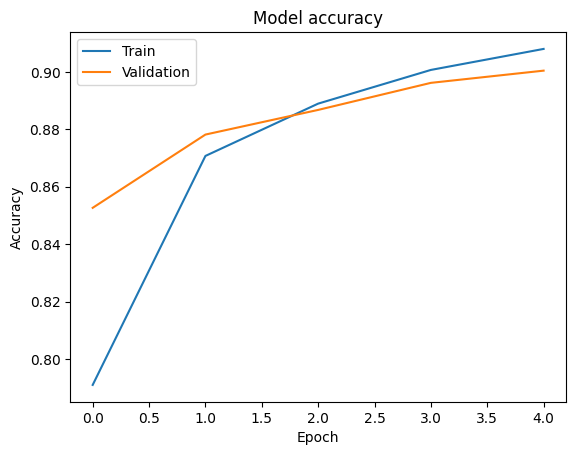

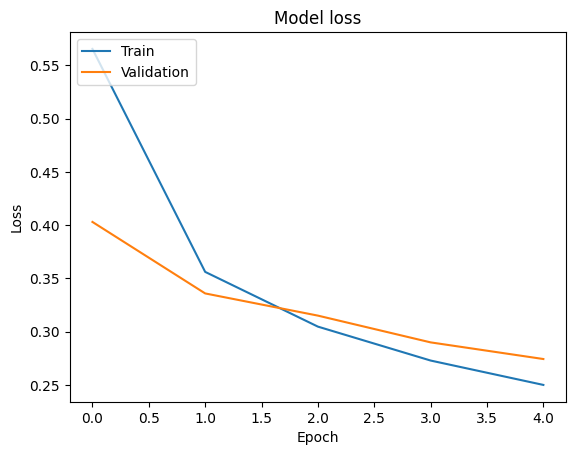

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
